## Carga de datos procesados

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Estadísticas
import scipy
 
# mis cosas
import sys
import os

# Añado el directorio padre (del que está este notebook) a sys.path
sys.path.append(os.path.abspath('../'))
from scripts.utils_agv import ini_inspec, crear_tabla_resumen, numericas, categoricas

#from Prof.utils import create_summary_table, descriptive_statistics, plot_variable_distribution, grafico_combinaciones

In [2]:
viviendas_Madrid = pd.read_csv('../data/processed/viviendas_EDA_agv.csv')
df = viviendas_Madrid.copy()

In [3]:
print("Tipos de datos antes de la conversión:")
print(df.dtypes)

# Convertir columnas de tipo object a string
df["url"] = df["url"].astype("string")
df["title"] = df["title"].astype("string")
df["description"] = df["description"].astype("string")
df["Distrito"] = df["Distrito"].astype("string")
df["Barrio"] = df["Barrio"].astype("string")
df["type"] = df["type"].astype("string")
df["adName"] = df["adName"].astype("string")

# Convertir columnas a int16
df["baths"] = df["baths"].astype("int16")
df["rooms"] = df["rooms"].astype("int16")
df["m2"] = df["m2"].astype("int16")


print("\nTipos de datos después de la conversión:")
print(df.dtypes)

Tipos de datos antes de la conversión:
url            object
title          object
price           int64
baths           int64
rooms           int64
m2              int64
description    object
type           object
Barrio         object
Distrito       object
adName         object
dtype: object

Tipos de datos después de la conversión:
url            string[python]
title          string[python]
price                   int64
baths                   int16
rooms                   int16
m2                      int16
description    string[python]
type           string[python]
Barrio         string[python]
Distrito       string[python]
adName         string[python]
dtype: object


In [4]:
df

,url,title,price,baths,rooms,m2,description,type,Barrio,Distrito,adName
0,https://www.idealista.com/inmueble/104027174/,Piso en venta en calle de Villanueva,1920000,3,3,183,Residencia única con acabados de la más alta c...,Pisos,Recoletos,Salamanca,Promora Madrid
1,https://www.idealista.com/inmueble/102321942/,Piso en venta en calle de Núñez de Balboa,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...",Pisos,Castellana,Salamanca,Engel & Völkers Madrid
2,https://www.idealista.com/inmueble/103334142/,Piso en venta en Conde Orgaz-Piovera,1300000,3,4,270,DE SALAS CONSULTORES INMOBILIARIOS MAV02679 le...,Pisos,ND,Hortaleza,De Salas Consultores Inmobiliarios
3,https://www.idealista.com/inmueble/104161987/,Piso en venta en Nueva España,1650000,3,3,248,Gilmar Real Estate vende espectacular piso en ...,Pisos,ND,Chamartín,Gilmar Viso - Chamartín
4,https://www.idealista.com/inmueble/103989666/,Piso en venta en calle de Claudio Coello,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,Pisos,Recoletos,Salamanca,Walter Haus Madrid
...,...,...,...,...,...,...,...,...,...,...,...
910,https://www.idealista.com/inmueble/103960809/,Piso en venta en calle de San Germán,1475000,4,5,376,Exclusiva vivienda en San GermánEngel & Völker...,Pisos,Castillejos,Tetuán,Engel & Völkers Madrid
911,https://www.idealista.com/inmueble/103494183/,Piso en venta en calle de Fuencarral,865000,2,2,127,"Esta magnífica vivienda, situada en una emblem...",Pisos,Trafalgar,Chamberí,Walter Haus Madrid
912,https://www.idealista.com/inmueble/102107584/,Piso en venta en Castellana,7900000,5,4,473,"Álvora Capital Properties, consultora inmobili...",Pisos,ND,Salamanca,álvora capital properties
913,https://www.idealista.com/inmueble/99991709/,Piso en venta en Costillares,990000,4,6,293,Espacioso y tranquilo piso en Pinar de Chamart...,Pisos,ND,Ciudad Lineal,Engel & Völkers Madrid


## Análisis Exploratorio de Datos (EDA)

### Análisis univariante

In [5]:
crear_tabla_resumen (df)

,Tipo de dato,Categoría,Cardinalidad,% Cardinalidad,Valores faltantes,% Valores faltantes
Columna,,,,,,
url,string[python],Categórica Nominal,915,100.000000,0,0.0
title,string[python],Categórica Nominal,551,60.218579,0,0.0
price,int64,Numérica Discreta,393,42.950820,0,0.0
baths,int16,Numérica Discreta,12,1.311475,0,0.0
rooms,int16,Numérica Discreta,13,1.420765,0,0.0
m2,int16,Numérica Discreta,351,38.360656,0,0.0
description,string[python],Categórica Nominal,908,99.234973,0,0.0
type,string[python],Binaria,2,0.218579,0,0.0
Barrio,string[python],Categórica Nominal,87,9.508197,0,0.0


El DataFrame consta de 11 columnas, 7 de ellas eran object, ahora cadena de texto, y las otras cuatro, numerica continua. Precio y metros cuadrados podrían ser numericas continuas, pero el redondeo presentado las deja en numerica discretas. 
Sorprende la baja cardinalidad de la columna tipología, la cual solo tien dos valores; esta condicion de binaria me permitirá confrontar diferencias entre ambas.
No tengo valores faltates, con lo que no será necesario hacer imputación alguna. 

In [6]:
numericas (df)

,count,mean,median,mode,std,min,25%,50%,75%,max,iqr,range,variance,std_dev,skewness,kurtosis,missing,missing_percent
columna,,,,,,,,,,,,,,,,,,
price,915,1.290575e+06,990000.0,850000,1.036640e+06,122000,625000.0,990000.0,1650000.0,8900000,1025000.0,8778000,1.074623e+12,1.036640e+06,2.303451,8.600689,0,0.0
baths,915,2.900546e+00,3.0,2,1.626487e+00,1,2.0,3.0,4.0,12,2.0,11,2.645459e+00,1.626487e+00,1.408534,3.062178,0,0.0
rooms,915,3.474317e+00,3.0,3,1.594625e+00,0,2.0,3.0,4.0,12,2.0,12,2.542830e+00,1.594625e+00,0.885662,1.917274,0,0.0
m2,915,2.172383e+02,158.0,133,1.917458e+02,14,104.0,158.0,264.0,1768,160.0,1754,3.676646e+04,1.917458e+02,3.364024,17.330217,0,0.0


In [7]:
categoricas (df)

,count,unique,top,freq,missing,missing_percent
columna,,,,,,
url,915,915,https://www.idealista.com/inmueble/100001075/,1,0,0.0
title,915,551,Piso en venta en Castellana,17,0,0.0
description,915,908,VISITA NUESTRO PISO PILOTO – ÚLTIMAS UNIDADES ...,3,0,0.0
type,915,2,Pisos,779,0,0.0
Barrio,915,87,ND,408,0,0.0
Distrito,915,21,Salamanca,162,0,0.0
adName,915,118,Engel & Völkers Madrid,134,0,0.0


De acuerdo con la guia proporcionada, vamos a realizar unos graficos para mostrar más claramente algunas conclusiones. 

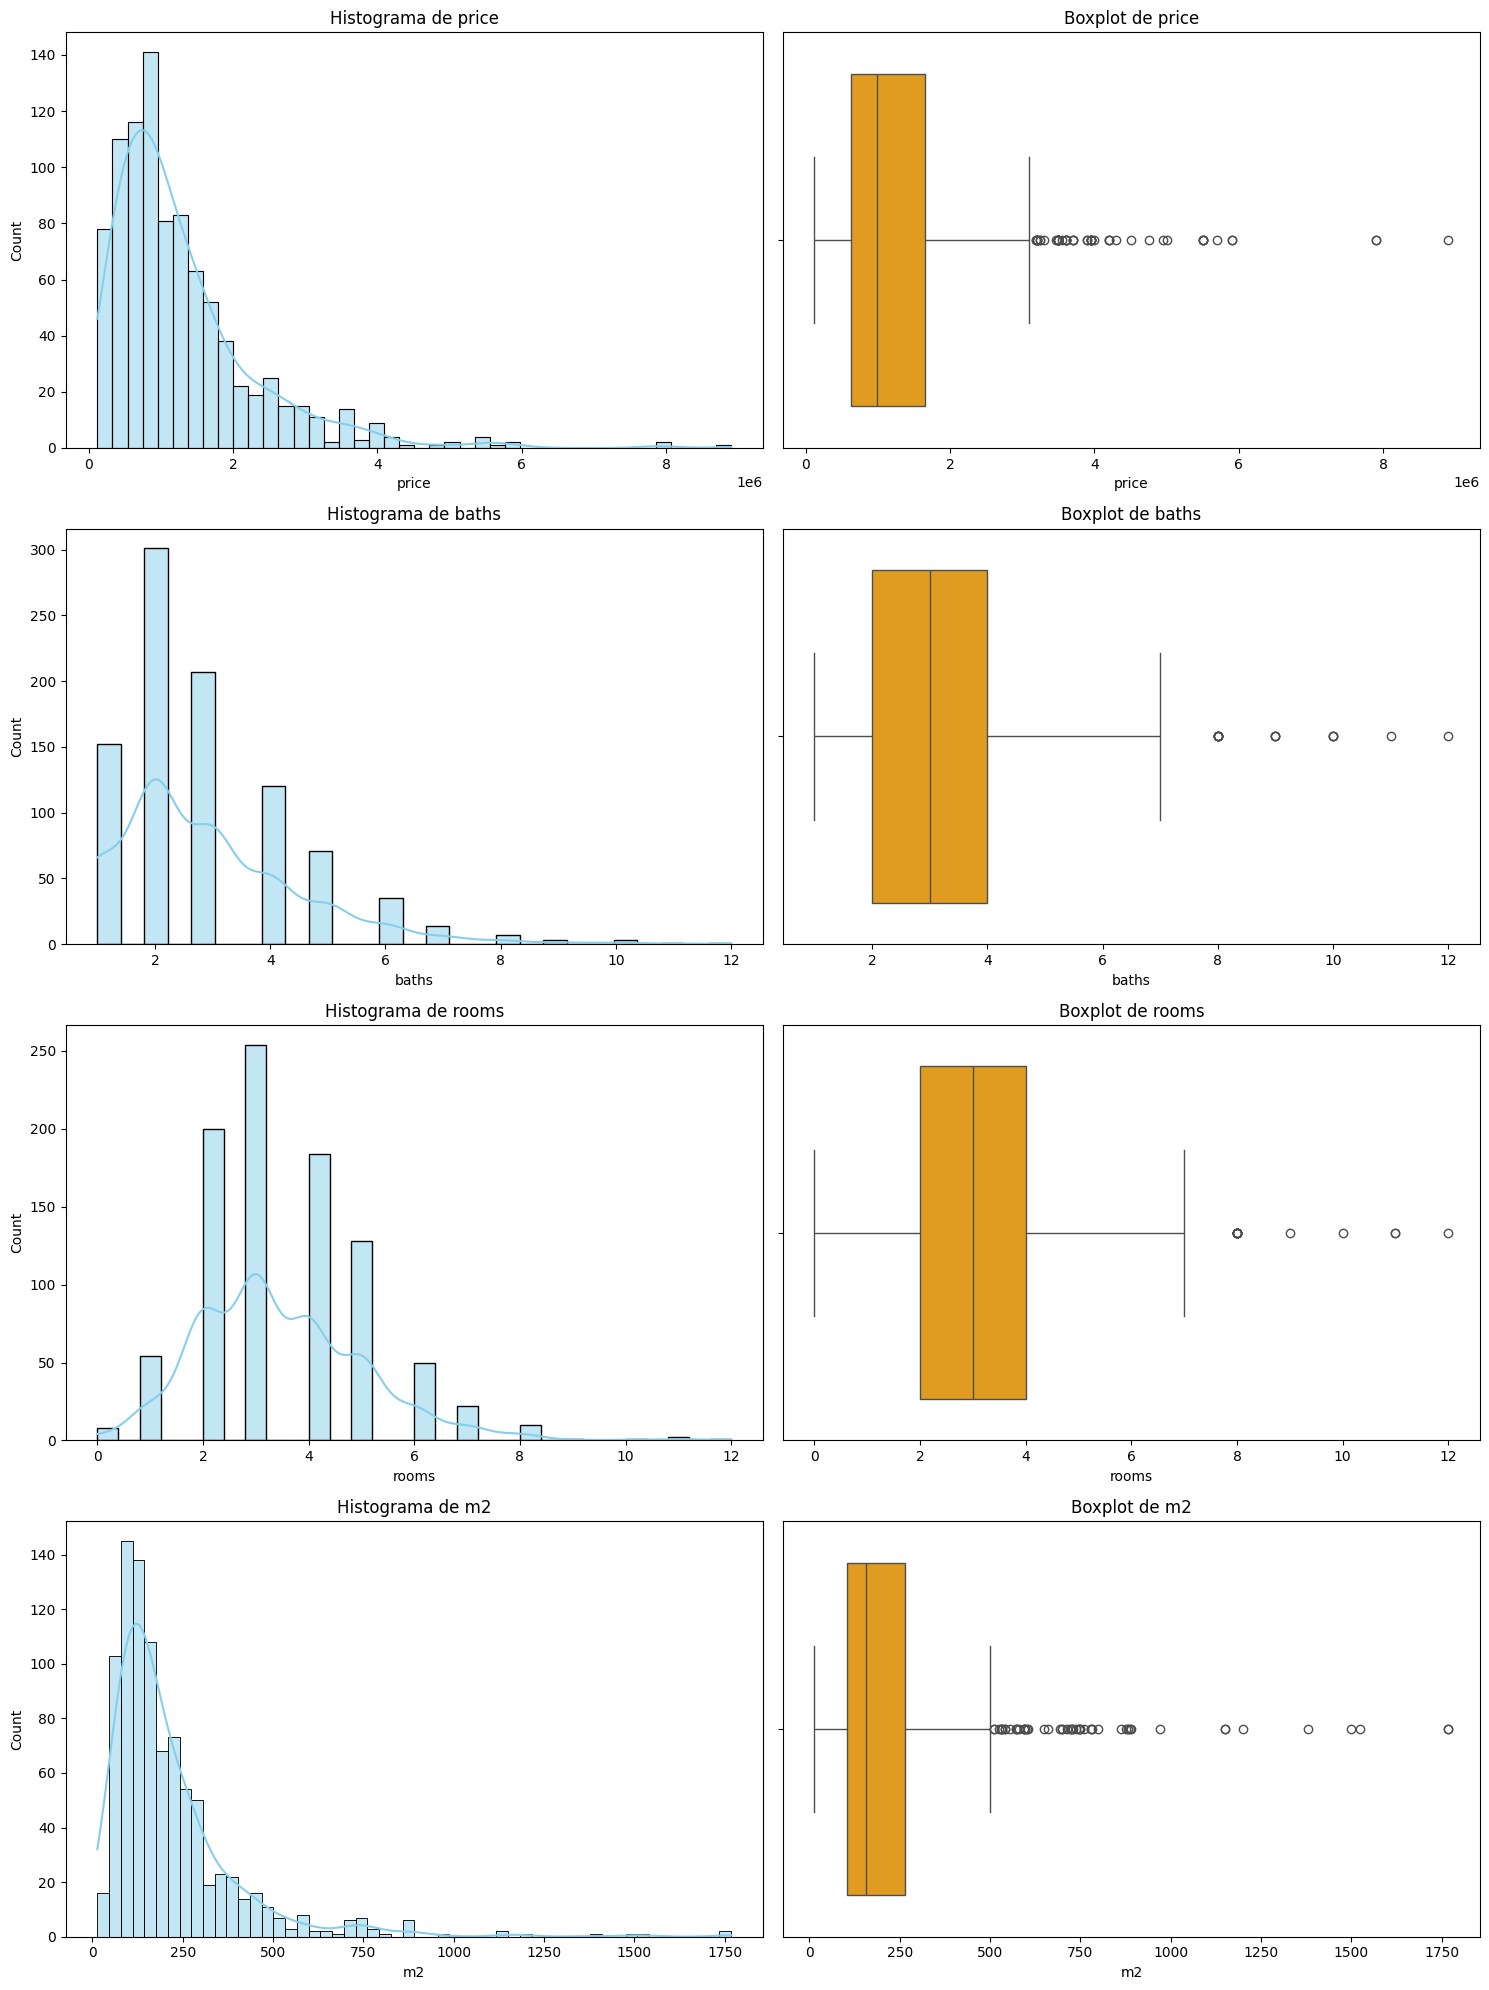

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de la figura
plt.figure(figsize=(15, 20))  # Tamaño de la figura

# Seleccionar columnas numéricas
numerical_columns = df.select_dtypes(include='number').columns[:4]  # Limitar a las primeras 4 columnas numéricas

# Crear gráficos
for i, feature in enumerate(numerical_columns):
    # Histograma (izquierda)
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)  # Gráfico en columna izquierda
    sns.histplot(data=df, x=feature, kde=True, color='skyblue')
    plt.title(f'Histograma de {feature}')
    
    # Boxplot girado (derecha)
    plt.subplot(len(numerical_columns), 2, 2 * i + 2)  # Gráfico en columna derecha
    sns.boxplot(data=df, x=feature, color='orange', orient='h')  # Boxplot horizontal
    plt.title(f'Boxplot de {feature}')

# Ajustar diseño
plt.tight_layout()
plt.show()
